In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter(action="ignore")
sns.set_theme(palette=sns.color_palette("muted"),style='darkgrid')

In [2]:
data = pd.read_csv("D:\\ds\\IMDb Movies India.csv",encoding='latin-1')

In [3]:
data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [4]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [6]:
data.shape

(15509, 10)

In [7]:
data= data.dropna(subset=["Year","Genre","Director","Actor 1","Actor 2","Actor 3","Rating"])

In [8]:
data=data.dropna().reset_index(drop=True)

In [9]:
data.shape

(5659, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 442.2+ KB


In [11]:
unique_values = data['Duration'].unique()
print(unique_values)

['109 min' '110 min' '147 min' '142 min' '82 min' '116 min' '96 min'
 '120 min' '161 min' '166 min' '102 min' '87 min' '132 min' '105 min'
 '146 min' '168 min' '158 min' '126 min' '94 min' '138 min' '124 min'
 '144 min' '157 min' '136 min' '107 min' '113 min' '80 min' '122 min'
 '149 min' '148 min' '130 min' '121 min' '188 min' '115 min' '103 min'
 '114 min' '170 min' '100 min' '99 min' '140 min' '128 min' '93 min'
 '125 min' '145 min' '75 min' '111 min' '134 min' '104 min' '92 min'
 '137 min' '127 min' '119 min' '135 min' '90 min' '150 min' '151 min'
 '95 min' '112 min' '143 min' '177 min' '117 min' '123 min' '72 min'
 '154 min' '175 min' '153 min' '78 min' '139 min' '133 min' '180 min'
 '46 min' '164 min' '162 min' '171 min' '160 min' '152 min' '163 min'
 '165 min' '141 min' '129 min' '156 min' '240 min' '172 min' '88 min'
 '155 min' '167 min' '106 min' '193 min' '108 min' '195 min' '174 min'
 '81 min' '178 min' '58 min' '184 min' '97 min' '176 min' '169 min'
 '131 min' '77 min' '91 

In [12]:
data["Duration"]=data.loc[:,"Duration"].str.replace("min","")
data["Duration"]=pd.to_numeric(data.loc[:,"Duration"])

In [13]:
unique_values = data['Votes'].unique()
print(unique_values)

['8' '35' '827' ... '70,344' '408' '1,496']


In [14]:
data["Votes"]=data.loc[:,"Votes"].str.replace(",","")
data["Votes"]=pd.to_numeric(data.loc[:,"Votes"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 442.2+ KB


In [16]:
data.duplicated(["Name","Year"]).sum()

2

In [17]:
data = data.drop_duplicates(subset=["Name", "Year"], keep='first').reset_index(drop=True)


In [18]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [19]:
duplicates_count = data.duplicated().value_counts()
print(duplicates_count)


False    5657
Name: count, dtype: int64


In [20]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Cleaning Genre and year columns and adding new genre column for further analysis

In [21]:
data["Year"] = data["Year"].astype(str).str.extract(r"(\d{4})")
data["Year"] = pd.to_numeric(data["Year"])


In [22]:
data["Genre"]=data.loc[:,"Genre"].astype(str).str.replace("Musical","Music")

In [23]:
data["Genre"].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Music',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Music',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horror, M

In [24]:
data["Main_genre"] = data.loc[:,"Genre"].str.extract("(^\w{1,11})")
data["Main_genre"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Music', 'Romance', 'Fantasy', 'Sci', 'Family', 'History',
       'Animation', 'War'], dtype=object)

In [25]:
data.describe()

Year    Duration       Rating         Votes
count  5657.000000  5657.00000  5657.000000    5657.00000
mean   1996.254198   133.44087     5.897967    2698.59802
std      19.729583    25.32374     1.381035   13653.82378
min    1931.000000    21.00000     1.100000       5.00000
25%    1983.000000   119.00000     5.000000      30.00000
50%    2002.000000   135.00000     6.100000     131.00000
75%    2013.000000   150.00000     6.900000     923.00000
max    2021.000000   321.00000    10.000000  591417.00000

In [26]:
data['Rating']=data.groupby(['Director','Actor 1'])['Rating'].transform(lambda x:x.mean())

In [27]:
data["Rating"]

0       7.000000
1       4.400000
2       4.700000
3       7.400000
4       5.600000
          ...   
5652    6.100000
5653    6.200000
5654    5.800000
5655    4.500000
5656    5.433333
Name: Rating, Length: 5657, dtype: float64

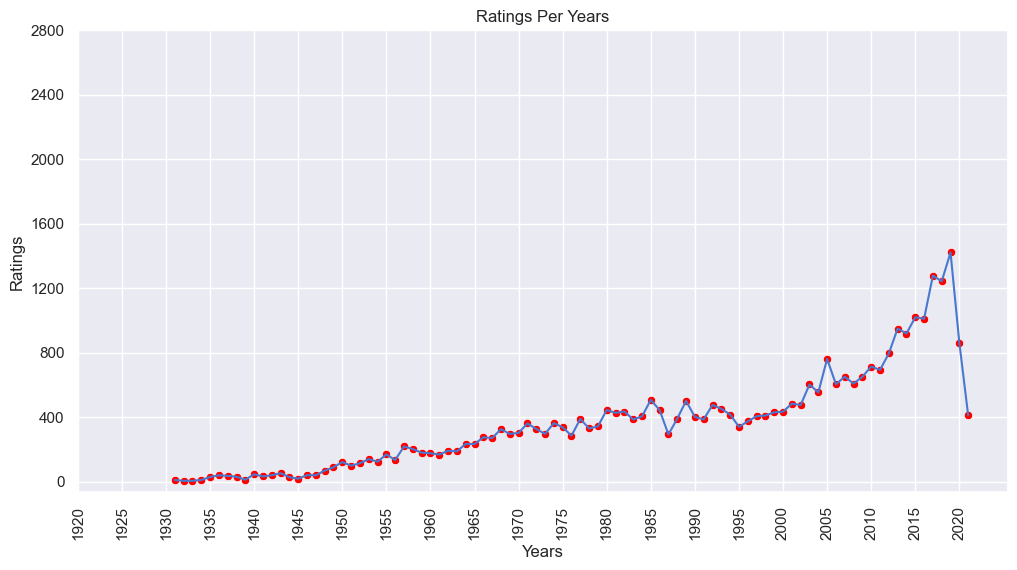

In [28]:
#year with best rating
rating_sum=data.groupby("Year")["Rating"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="Year",y="Rating",data=rating_sum)
sns.scatterplot(x="Year",y="Rating",data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

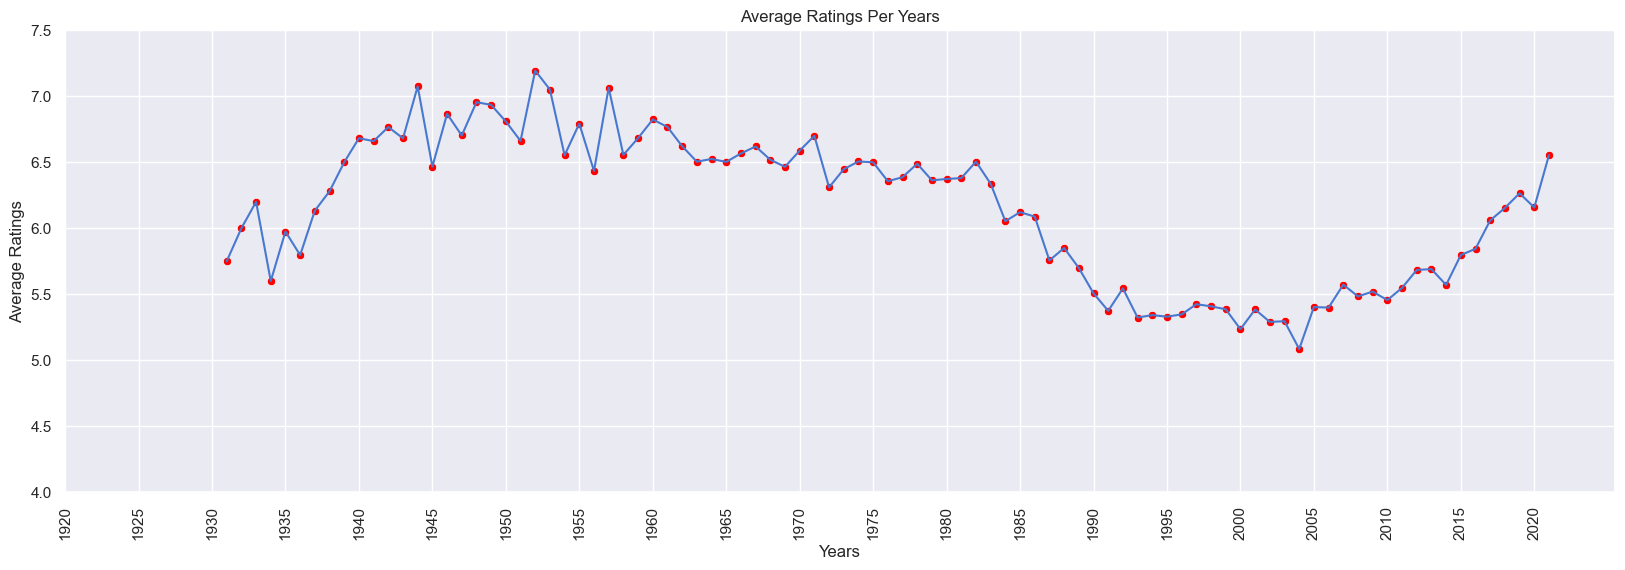

In [29]:
rating_avg=data.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(20,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.yticks(np.arange(4,8,0.5))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

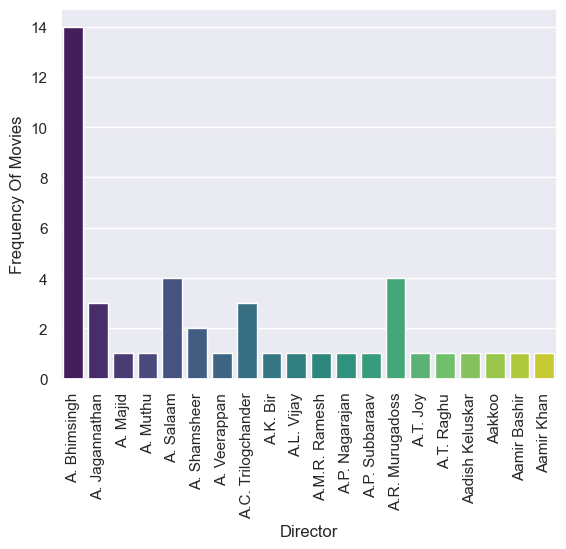

In [30]:
top_20=data.groupby("Director")['Name'].count()[0:20]
sns.barplot(x=top_20.index,y=top_20.values,data=data,palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Frequency Of Movies')
plt.xlabel('Director')
plt.show()


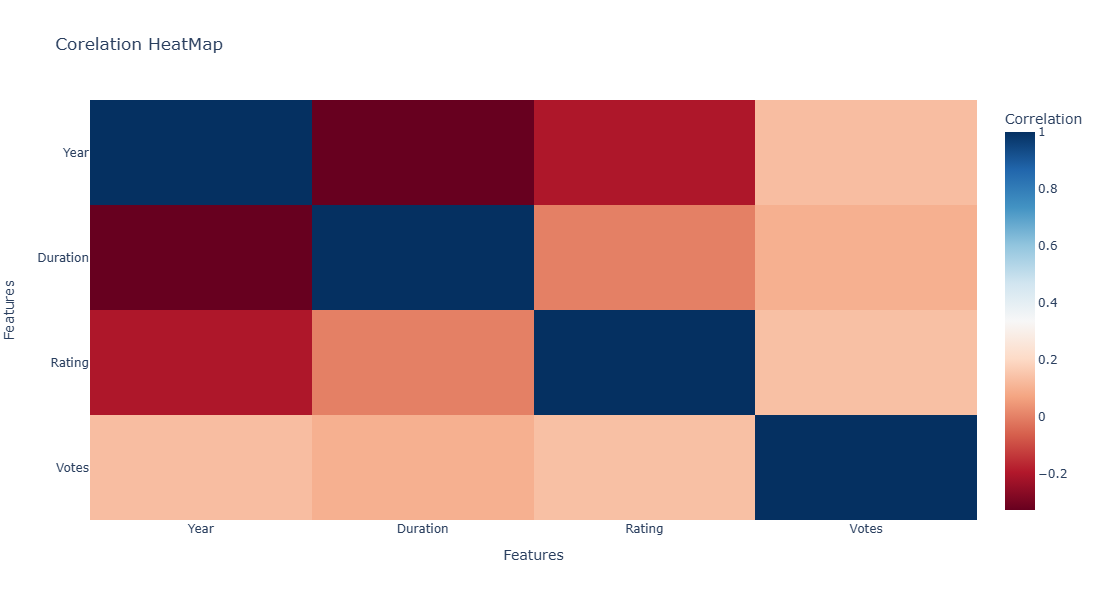

In [31]:
import plotly.graph_objs as go

numeric_data=data.select_dtypes(include=[np.number])
corr=numeric_data.corr()
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    colorbar=dict(
        title='Correlation'  # Specify the title for the colorbar
    )
))
fig.update_layout(title="Corelation HeatMap",width=800,height=600,xaxis_title="Features",yaxis_title="Features",yaxis_autorange='reversed')
fig.show()

In [32]:
data= data[(np.abs(stats.zscore(data[["Rating","Votes","Duration"]]))<3).all(axis=1)]

In [33]:
data.shape

(5543, 11)

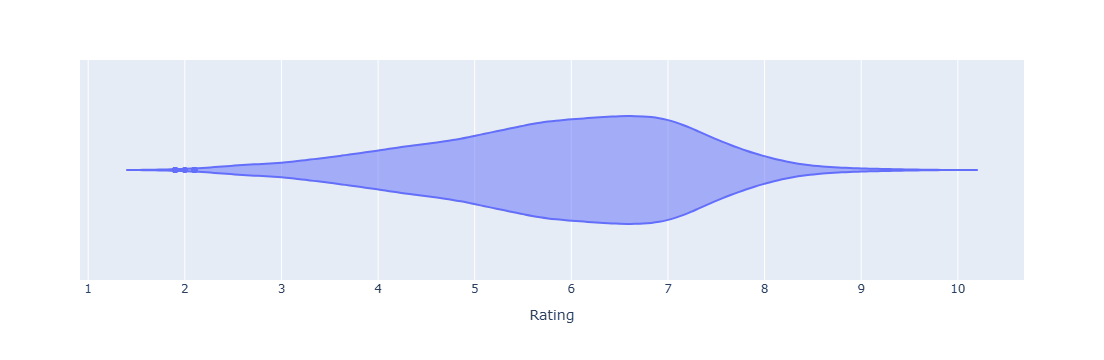

In [34]:
iplot(px.violin(data_frame=data,x="Rating"))


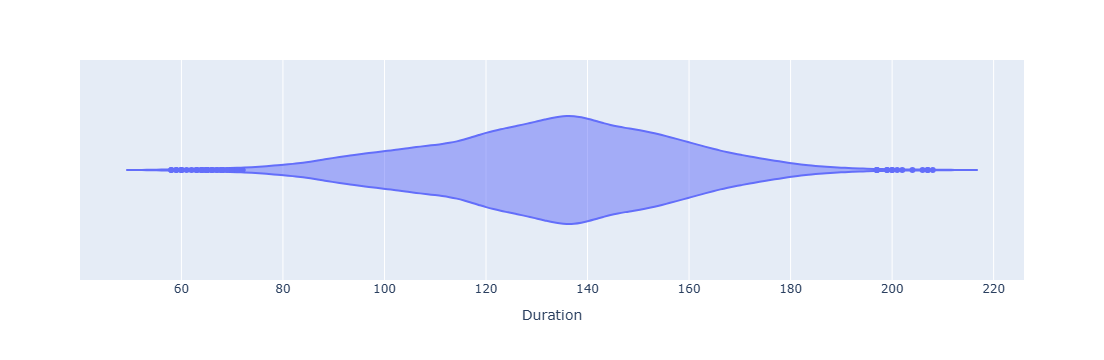

In [35]:
iplot(px.violin(data_frame=data,x="Duration"))

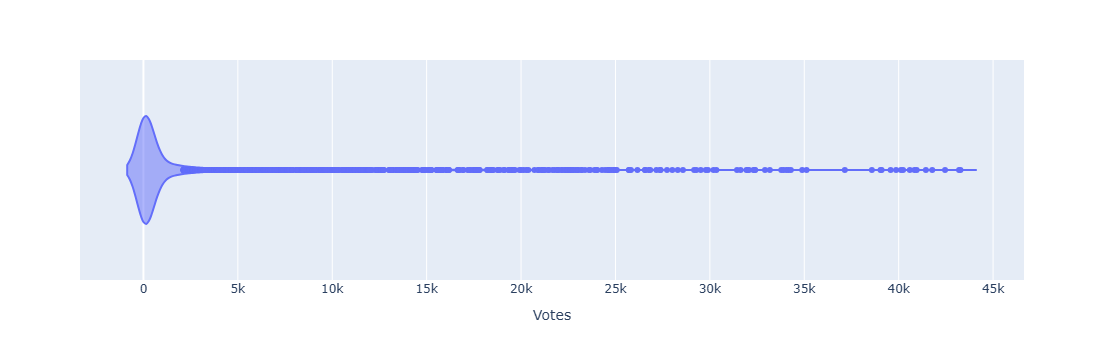

In [36]:
iplot(px.violin(data_frame=data,x="Votes"))

Rating and duration are pretty much normally distributed
Votes are right skewed and has alot of outliers but we cannot remove them

Distribution of movies across genere

In [37]:
data.Genre.value_counts().reset_index()

Genre  count
0                            Drama    833
1             Action, Crime, Drama    324
2                   Drama, Romance    324
3                    Action, Drama    202
4                    Comedy, Drama    198
..                             ...    ...
355               History, Romance      1
356          Drama, History, Sport      1
357       Animation, Comedy, Drama      1
358        Family, Drama, Thriller      1
359  Documentary, Biography, Music      1

[360 rows x 2 columns]

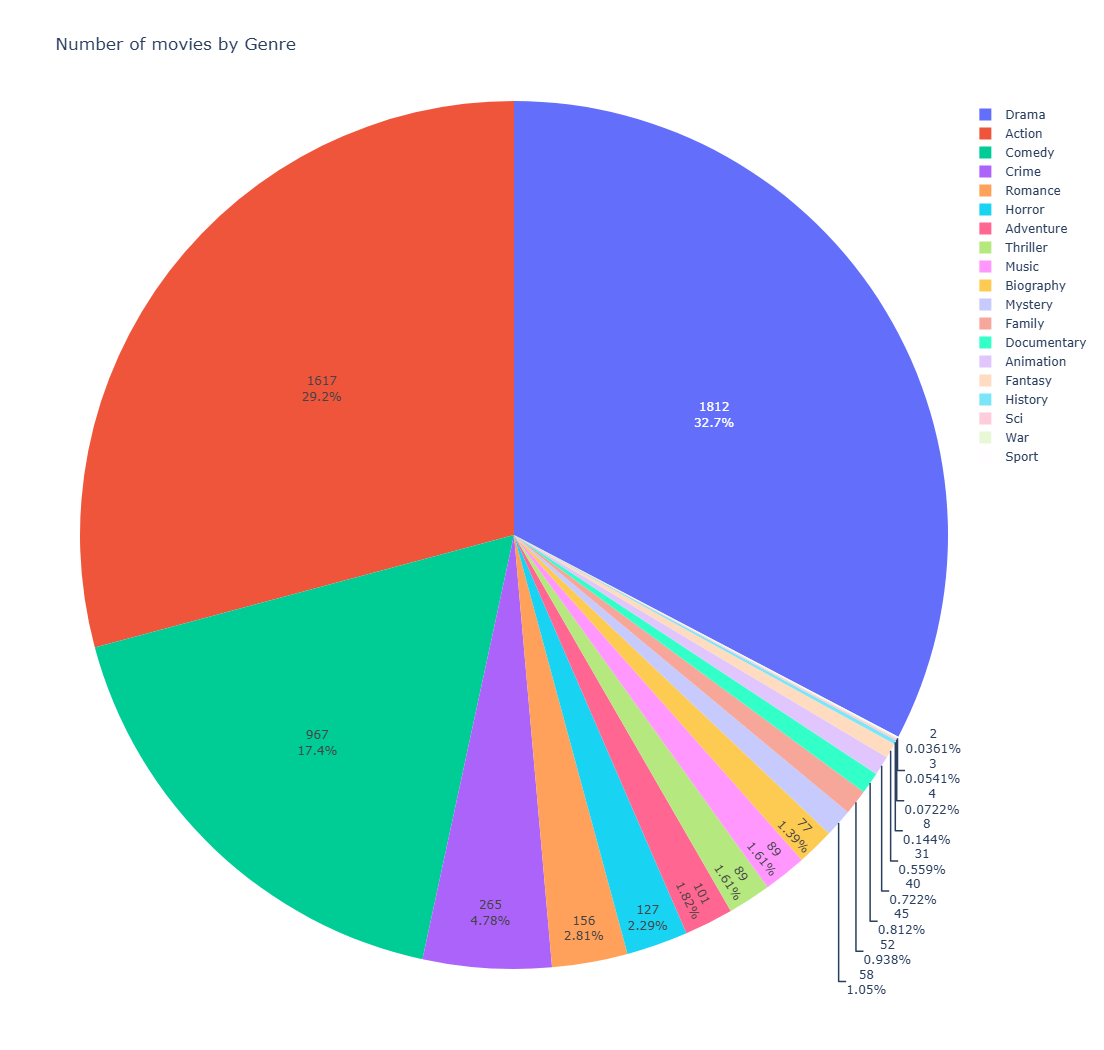

In [38]:
genere = data.Main_genre.value_counts().reset_index()
iplot(px.pie(data_frame=genere, names=genere.Main_genre, values=genere["count"], title="Number of movies by Genre", height=1050).update_traces(textinfo="value+percent"))


Which genere are highest rated

In [39]:
data.groupby("Main_genre")["Rating"].mean().sort_values(ascending = False)

Main_genre
Documentary    7.566667
History        7.225000
Biography      6.584307
Sci            6.325000
Family         6.299006
Drama          6.229532
Music          6.202341
Fantasy        6.188978
Adventure      6.149546
Crime          6.092527
Animation      5.997500
Comedy         5.824286
Mystery        5.817465
Sport          5.800000
Romance        5.630734
Action         5.508718
Thriller       5.297488
Horror         4.781237
War            4.333333
Name: Rating, dtype: float64

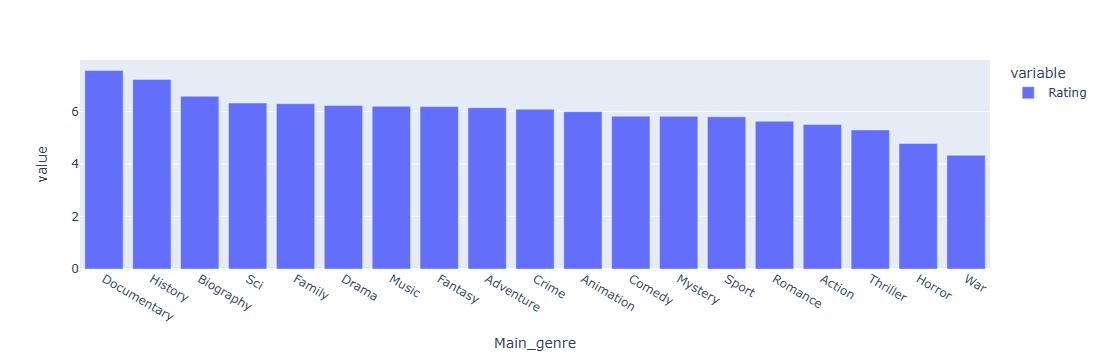

In [40]:
rating_by_genre=data.groupby("Main_genre")["Rating"].mean().sort_values(ascending=False)
iplot(px.bar(data_frame=rating_by_genre))

Distribution of movies  over time 

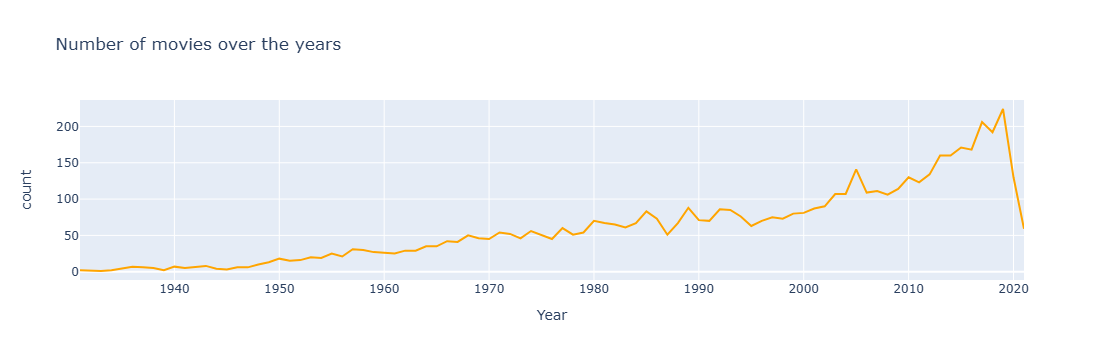

In [41]:
movies_by_year=data["Year"].value_counts().reset_index().sort_values(by="Year")
iplot(px.line(data_frame=movies_by_year,x="Year",y="count",title="Number of movies over the years",color_discrete_sequence=["orange"]))

The number of movies are increasing over the years peaking in 2019 at 224 movies

Rating and number of votes over the years

In [42]:
rating_by_years=data.groupby("Year").agg({"Rating":"mean","Votes":"sum"}).reset_index()

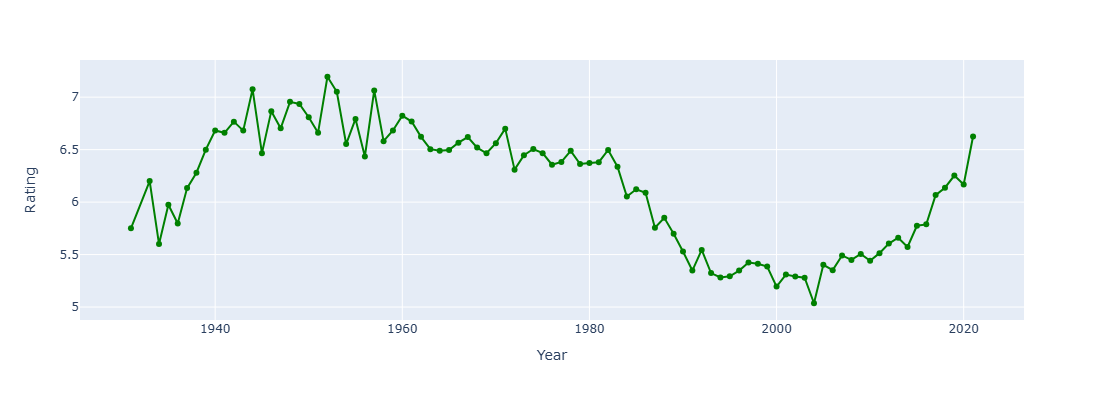

In [43]:
iplot(px.line(data_frame=rating_by_years,x="Year",y="Rating",markers=True,color_discrete_sequence=["green"],height=400))

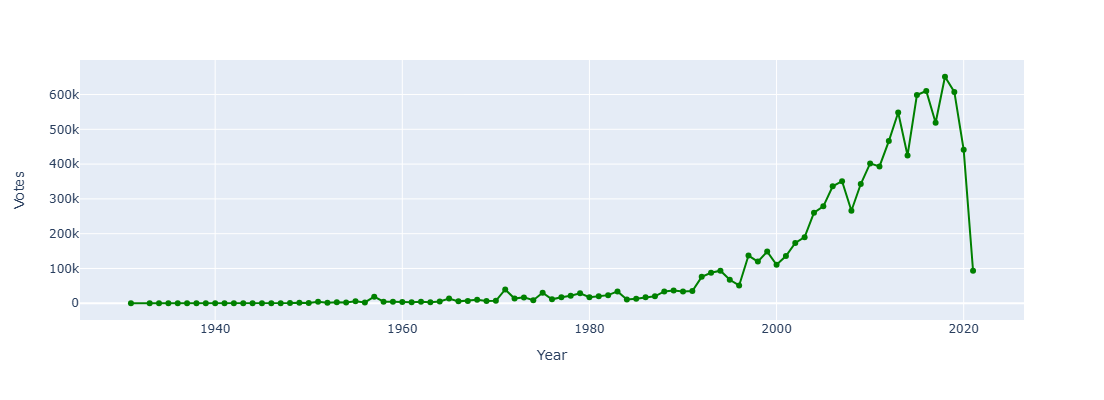

In [44]:
iplot(px.line(data_frame=rating_by_years,x="Year",y="Votes",markers=True,color_discrete_sequence=["green"],height=400))

While rating is higher in the early years (before 1990) votes are extemely low compared to after 1999
Votes started increasing after 1990 to almost double in the next year and peaked at 650k in 2018

In [45]:
def top_10_rating(col):
    return data.groupby(col)["Rating"].agg(["mean", "count"]).query("count >= 10").sort_values(by="mean", ascending=False)[:10].reset_index()


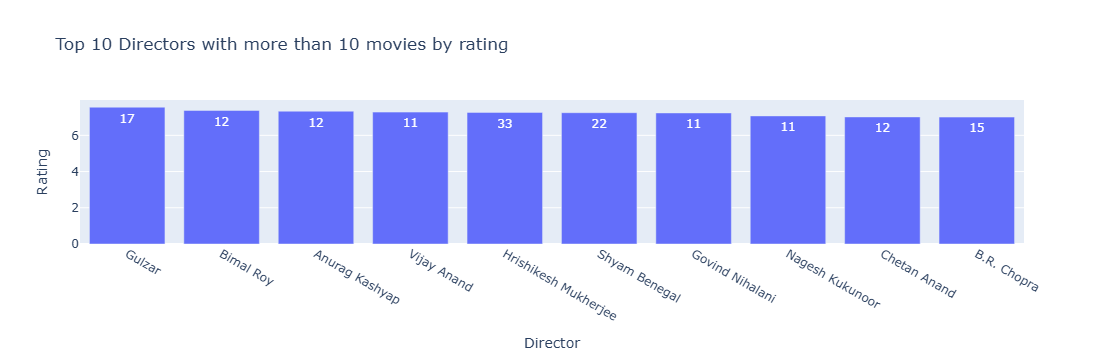

In [46]:
top_10_director = top_10_rating("Director")

import plotly.express as px

fig = px.bar(
    data_frame=top_10_director,
    x="Director",
    y="mean",
    text="count",
    labels={'mean': 'Rating', 'count': 'Number of movies'},
    title="Top 10 Directors with more than 10 movies by rating"
)
fig.show()


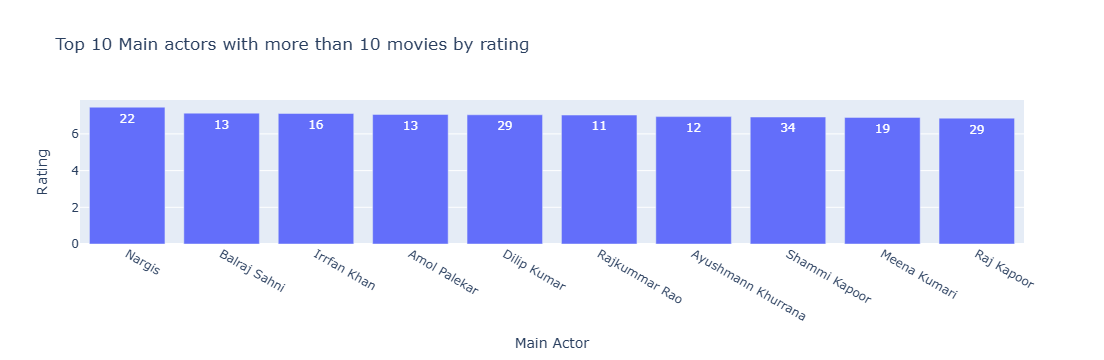

In [47]:
top_10_actors1=top_10_rating("Actor 1")

iplot(px.bar(data_frame=top_10_actors1,x="Actor 1",y="mean",text="count",labels={"Actor 1":"Main Actor","mean":"Rating","count":"Number of movies"},title="Top 10 Main actors with more than 10 movies by rating"))

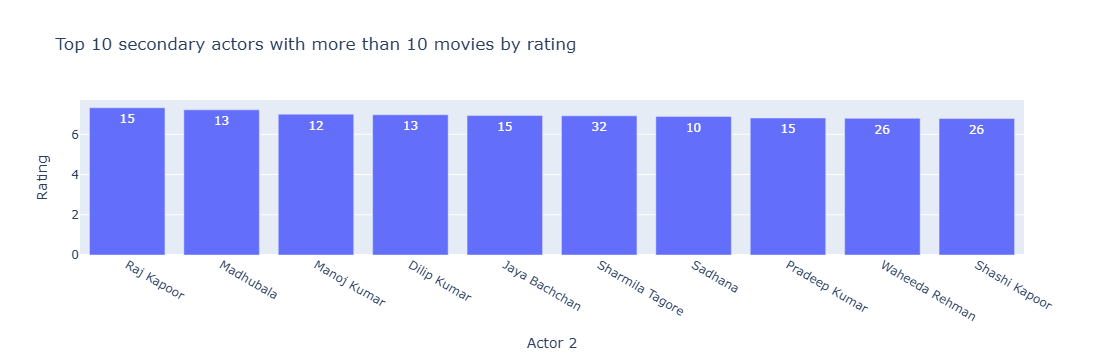

In [48]:
top_10_actors2 = top_10_rating("Actor 2")

iplot(px.bar(data_frame=top_10_actors2,x="Actor 2",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},
            title="Top 10 secondary actors with more than 10 movies by rating"))

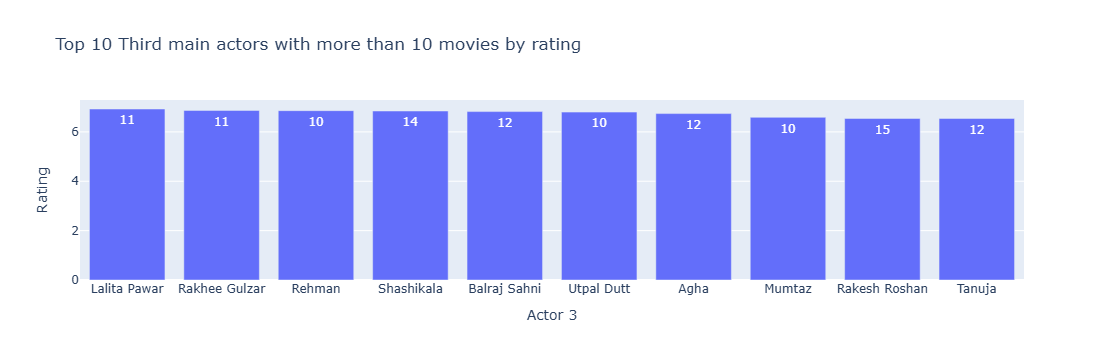

In [49]:
top_10_actors3 = top_10_rating("Actor 3")

iplot(px.bar(data_frame=top_10_actors3,x="Actor 3",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},
            title="Top 10 Third main actors with more than 10 movies by rating"))

Importing libraries for machine learning and transforming data

In [50]:
from sklearn.model_selection import train_test_split,cross_val_score
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics
#import scikitplot as skplt
#import category_encoders as ce

In [51]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median absolute error: ',round(median_absolute_error,4))

In [52]:
data =data.drop(columns=["Name","Main_genre"])

In [53]:
X = data.drop(columns="Rating")
y = data["Rating"]

In [54]:
X

Year  Duration                      Genre  Votes         Director  \
0     2019       109                      Drama      8    Gaurav Bakshi   
1     2019       110            Comedy, Romance     35       Ovais Khan   
2     1997       147       Comedy, Drama, Music    827     Rahul Rawail   
3     2005       142        Drama, Romance, War   1086   Shoojit Sircar   
4     2012        82  Horror, Mystery, Thriller    326    Allyson Patel   
...    ...       ...                        ...    ...              ...   
5652  2015       115                      Drama    408      Mozez Singh   
5653  2001       153  Biography, Drama, History   1496    Shyam Benegal   
5654  1989       125       Action, Crime, Drama     44  S.P. Muthuraman   
5655  1999       129              Action, Drama    655       Kuku Kohli   
5656  1998       130              Action, Drama     20     K.C. Bokadia   

              Actor 1                 Actor 2           Actor 3  
0        Rasika Dugal          Vivek Ghamande     Arvind Jangid  
1             Prateik              Ishita Raj   Siddhant Kapoor  
2          Bobby Deol  Aishwarya Rai Bachchan     Shammi Kapoor  
3     Jimmy Sheirgill          Minissha Lamba    Yashpal Sharma  
4           Yash Dave          Muntazir Ahmad      Kiran Bhatia  
...               ...                     ...               ...  
5652    Vicky Kaushal         Sarah Jane Dias  Raaghavv Chanana  
5653   Karisma Kapoor                   Rekha    Manoj Bajpayee  
5654      Chiranjeevi              Jayamalini       Rajinikanth  
5655     Akshay Kumar          Twinkle Khanna       Aruna Irani  
5656       Dharmendra              Jaya Prada       Arjun Sarja  

[5543 rows x 8 columns]

In [55]:
y

0       7.000000
1       4.400000
2       4.700000
3       7.400000
4       5.600000
          ...   
5652    6.100000
5653    6.200000
5654    5.800000
5655    4.500000
5656    5.433333
Name: Rating, Length: 5543, dtype: float64

Encoding data using JamesSteinEncoder

Applying ML

In [59]:
import category_encoders as ce

encoder = ce.JamesSteinEncoder(return_df=True)
encoder.fit(X,y)
X = encoder.transform(X.loc[:,:])

In [60]:
#Normalizing data using Robust scaler
scaler = RobustScaler()
scaler.fit(X)
X.loc[:,:] = scaler.transform(X.loc[:,:])

In [61]:
X

Year  Duration     Genre     Votes  Director   Actor 1   Actor 2  \
0     0.580645 -0.838710  0.630140 -0.141572  0.994669  1.000770  1.263135   
1     0.580645 -0.806452 -0.226758 -0.109178 -1.437558 -0.349949 -1.754008   
2    -0.129032  0.387097  0.193942  0.841032 -0.368972 -0.760645 -0.117498   
3     0.129032  0.225806  1.023702  1.151770  1.144935 -0.309377  0.903077   
4     0.354839 -1.709677 -0.048586  0.239952 -0.314991 -0.357405 -0.075589   
...        ...       ...       ...       ...       ...       ...       ...   
5652  0.451613 -0.645161  0.630140  0.338332  0.152744  0.220146  0.218740   
5653  0.000000  0.580645  1.287420  1.643671  1.100585 -0.715041 -0.073791   
5654 -0.387097 -0.322581 -0.246770 -0.098380  0.305736  0.315225 -0.129392   
5655 -0.064516 -0.193548 -0.451233  0.634673 -0.544626 -0.380286 -0.985686   
5656 -0.096774 -0.161290 -0.451233 -0.127175 -0.917463 -0.014748 -0.079379   

       Actor 3  
0     1.279126  
1    -1.747537  
2     0.065263  
3     0.314117  
4    -0.385277  
...        ...  
5652 -0.085200  
5653 -0.237039  
5654  0.188128  
5655 -0.119095  
5656 -0.543151  

[5543 rows x 8 columns]

Training XGBoost model

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [63]:
xgb_model = XGBRegressor(objective ='reg:squarederror',gamma=0.09,learning_rate=0.08,subsample=0.7)

In [64]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

xgb_model.fit(X_train,y_train)

In [65]:
xgb_model.score(X_train,y_train)

0.9341133077439039

In [66]:
xgb_model.score(X_test,y_test)

0.8740042234734674

In [67]:
y_pred = xgb_model.predict(X_test)
print(f"Report:Lgbm model")
print(f"{regression_results(y_test, y_pred)}\n")

Report:Lgbm model
explained_variance:  0.8743
mean_squared_log_error:  0.0062
r2:  0.874
MAE:  0.3131
MSE:  0.2238
RMSE:  0.473
Median absolute error:  0.1959
None



In [68]:
score = cross_val_score(xgb_model,X,y,cv=10)
avg = np.mean(score)
print(f"cross validation score for XGBoost:{score}")
print(f"average cross validation score for XGBoost:{avg}\n")

cross validation score for XGBoost:[0.86065096 0.87272978 0.88338541 0.88137576 0.86913884 0.87349079
 0.85886275 0.85221265 0.8249153  0.87728013]
average cross validation score for XGBoost:0.8654042376309994



Feature importances by the model

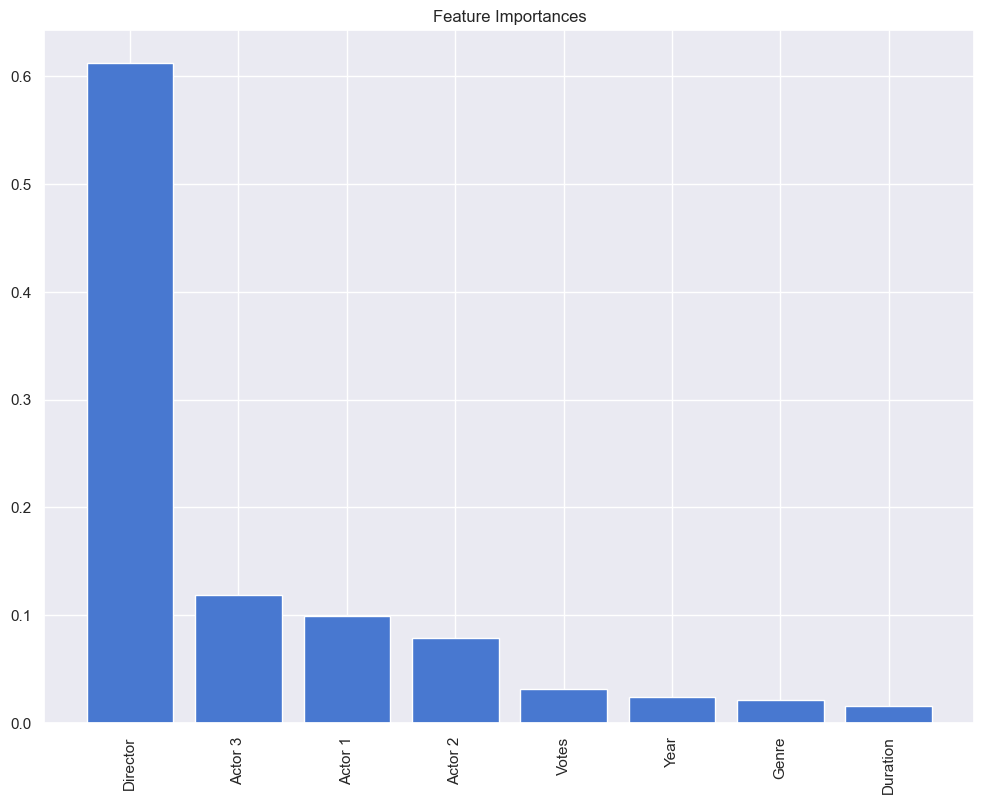

In [69]:
fs = xgb_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)
plt.show()

Here we try to predict new data we chose data close to row 10 of the head

In [72]:
data.head(15)

Year  Duration                      Genre  Rating  Votes  \
0   2019       109                      Drama     7.0      8   
1   2019       110            Comedy, Romance     4.4     35   
2   1997       147       Comedy, Drama, Music     4.7    827   
3   2005       142        Drama, Romance, War     7.4   1086   
4   2012        82  Horror, Mystery, Thriller     5.6    326   
5   2014       116    Action, Crime, Thriller     4.0     11   
6   2004        96                      Drama     6.2     17   
7   2016       120                     Horror     5.9     59   
8   1991       161  Horror, Romance, Thriller     6.3    983   
9   2012       166     Comedy, Drama, Romance     5.7    512   
10  2018       102              Comedy, Drama     7.4   6619   
11  2010        87     Comedy, Drama, Romance     6.3    162   
12  1958       132      Crime, Drama, Mystery     7.2     72   
13  2021       105           Horror, Thriller     4.4     63   
14  2017       116             Comedy, Horror     6.6     26   

              Director             Actor 1                 Actor 2  \
0        Gaurav Bakshi        Rasika Dugal          Vivek Ghamande   
1           Ovais Khan             Prateik              Ishita Raj   
2         Rahul Rawail          Bobby Deol  Aishwarya Rai Bachchan   
3       Shoojit Sircar     Jimmy Sheirgill          Minissha Lamba   
4        Allyson Patel           Yash Dave          Muntazir Ahmad   
5    Biju Bhaskar Nair           Augustine            Fathima Babu   
6          Madhu Ambat      Rati Agnihotri          Gulshan Grover   
7      Arshad Siddiqui        Pankaj Berry            Anubhav Dhir   
8         Partho Ghosh       Jackie Shroff           Madhuri Dixit   
9          Rabi Kinagi                Jeet           Koyel Mallick   
10        Umesh Shukla    Amitabh Bachchan            Rishi Kapoor   
11     Sharat Katariya      Neil Bhoopalam             Anusha Bose   
12  Pramod Chakravorty           Guru Dutt          Waheeda Rehman   
13     Ram Gopal Varma  Mithun Chakraborty       Makrand Deshpande   
14           Seshu Kmr            Mast Ali              Aziz Naser   

              Actor 3  
0       Arvind Jangid  
1     Siddhant Kapoor  
2       Shammi Kapoor  
3      Yashpal Sharma  
4        Kiran Bhatia  
5                Byon  
6       Atul Kulkarni  
7        Hritu Dudani  
8       Javed Jaffrey  
9         Sujoy Ghosh  
10         Vijay Raaz  
11  Manu Rishi Chadha  
12         Shashikala  
13        Dalip Tahil  
14        Heena Shaik

In [73]:
new_data = pd.DataFrame({'Year':[2015],'Duration':[115],\
                         'Genre':'Comedy,Drama','Votes':[7123],'Director':['Sharat Katariya'],\
                         'Actor 1':['Jeet'],'Actor 2':['Rishi Kapoor'],'Actor 3':['Vijay Raaz'],})

In [74]:
new_data

Year  Duration         Genre  Votes         Director Actor 1       Actor 2  \
0  2015       115  Comedy,Drama   7123  Sharat Katariya    Jeet  Rishi Kapoor   

      Actor 3  
0  Vijay Raaz

In [75]:
#Scaling and Normalizing new data

In [76]:
new_data = encoder.transform(new_data)
new_data.loc[:,:] = scaler.transform(new_data.loc[:,:])
new_data

Year  Duration     Genre     Votes  Director   Actor 1   Actor 2  \
0  0.451613 -0.645161 -0.003406  8.394721  0.710435  0.283308  0.350916   

    Actor 3  
0  0.023398

In [77]:
xgb_model.predict(new_data)

array([6.622335], dtype=float32)

In [78]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [81]:
LR.fit(X_train,y_train)
pre_test=LR.predict(X_test)

In [82]:
pre_test

array([5.28571638, 6.06102332, 5.57588035, ..., 5.36011005, 5.39766476,
       5.7740082 ])